# Homework_01

# Importing Libraries and loading Data using Pandas Library

In [259]:
import pandas as pd
import numpy as np
import seaborn as sns;sns.set()
import matplotlib.pyplot as plt

plt.style.use("ggplot")
sns.set(style="ticks")

data = pd.read_csv(r"\Users\m.paliwal\Desktop\ML Lectures\hour.csv")
#importing data using pandas library
data['formatted_date'] = pd.to_datetime(data['dteday'])

data['Week_Number'] = pd.to_datetime(data['dteday']).dt.week

In [260]:
#Taking out Data info and printing first Few cells of the data 
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,formatted_date,Week_Number
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01,52
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01,52
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011-01-01,52
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011-01-01,52
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011-01-01,52


# Creating a Auto - Correlation matrix heatmap for the Data Set

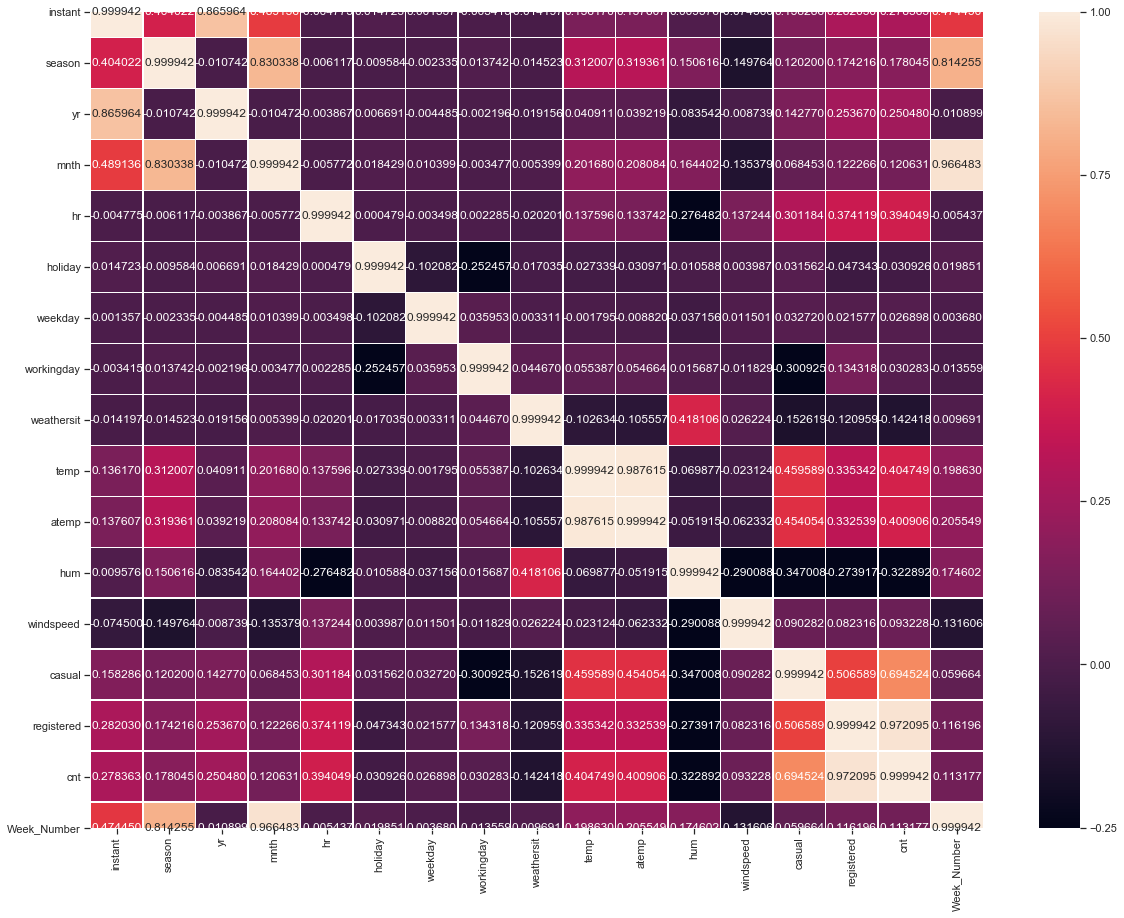

In [203]:
data = data.drop(['formatted_date',"dteday"],1)
data1 = data-data.mean()
data2 = data1.T@data1
data2 = data2/17379

sd = data.std()
sd1 = np.multiply.outer(sd.to_numpy(),sd.to_numpy())

final = data2/sd1
f, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(final,vmin=-0.25, vmax=1,annot=True, fmt="f",linewidths=.5)



# Plot for Each Feature Vs the count of Total bike rentals

As seen from the joint point below both TEMPRATURE to usage and ADJUSTED TEMPERATURE to usage have some correlation 
with the total number of rental bikes but linear fit is'nt the best way to fit the relationship or find the best fit curve.This should be intutuive, as warmer the temperature the more bikes get rented.There is also a dip at the end for the total number of bikes rented.Once again this should make sense as the temperature outside gets too hot, people tend to rent the bike less.As 
can be seen from the distribution of both graph, they tend to be similar and presents a redundancy to the features selected.So either the two could be combined or we can drop one of the two features. 


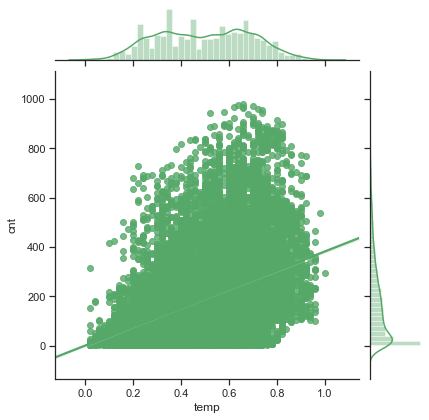

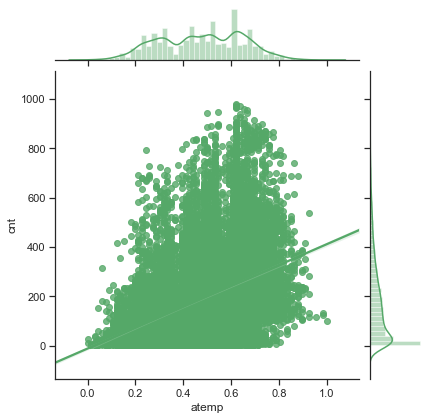

In [205]:
g = sns.jointplot("temp", "cnt", data=data, kind="reg",color='g')
g = sns.jointplot("atemp", "cnt", data=data, kind="reg",color='g')
print ("As seen from the joint point below both TEMPRATURE to usage and ADJUSTED TEMPERATURE to usage have some correlation \nwith the total number of rental bikes but linear fit is'nt the best way to fit the relationship or find the best fit curve.This should be intutuive, as warmer the temperature the more bikes get rented.There is also a dip at the end for the total number of bikes rented.Once again this should make sense as the temperature outside gets too hot, people tend to rent the bike less.As \ncan be seen from the distribution of both graph, they tend to be similar and presents a redundancy to the features selected.So either the two could be combined or we can drop one of the two features. ")


Observing the Jointplot for humidity, we can see there is a negative correlation or inverse realtionship with the total number of registered bikes with a linear fit bieng very close to best curve fit with all the plots except for outliers in low 
humidity.This can be clearly visualized ad high humidity bieng a deterrent for rent of bike cycles.This situation can also be 
related to the weather Categorial plot where heavy rainfall has a direct impact of renting of bike cycles.


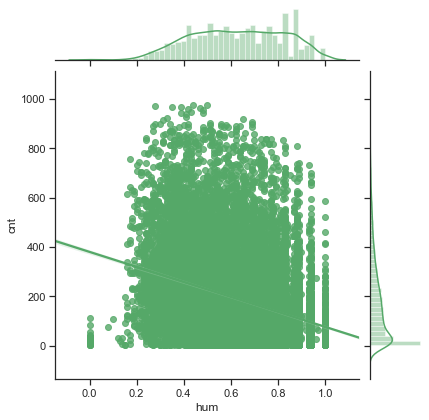

In [211]:
g = sns.jointplot("hum", "cnt", data=data, kind="reg",color='g')
print("Observing the Jointplot for humidity, we can see there is a negative correlation or inverse realtionship with the total number of registered bikes with a linear fit bieng very close to best curve fit with all the plots except for outliers in low \nhumidity.This can be clearly visualized ad high humidity bieng a deterrent for rent of bike cycles.This situation can also be \nrelated to the weather Categorial plot where heavy rainfall has a direct impact of renting of bike cycles.")


As high wind makes it difficult to peddle the bike so we can use this data to help determine the function of usage but after observing the Windspeed visualizations, it shows little interpreation with affect it has on the bike rental usage.The wind 
speed clearly shows a strong correlation with the total number of bike rentals.


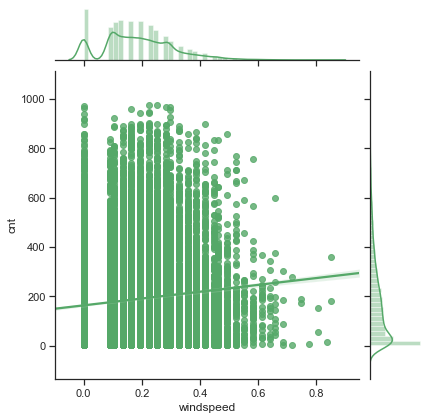

In [215]:
g = sns.jointplot("windspeed", "cnt", data=data, kind="reg",color='g')
print("As high wind makes it difficult to peddle the bike so we can use this data to help determine the function of usage but after observing the Windspeed visualizations, it shows little interpreation with affect it has on the bike rental usage.The wind \nspeed clearly shows a strong correlation with the total number of bike rentals.")


1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

This attribute will help us capture the effect of weather outlook on rider's behaviour.The weather situation plot is explicitly clear.People tend to rent bikes more on clear weather and decreases as the weather situation worsens.Thic could be correlated 
with our humidity plot where high humidity tends to lead to a situation of rainfall and acts as a deterrent to rental of bike 
cycles.


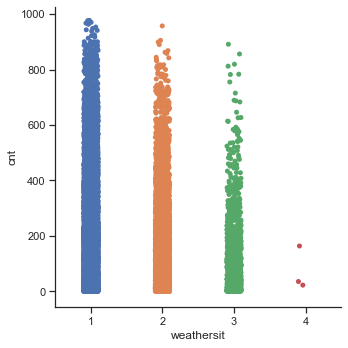

In [220]:
sns.catplot(x="weathersit", y="cnt",data=data);
print("1: Clear, Few clouds, Partly cloudy, Partly cloudy\n2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\n3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds\n4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog\n\nThis attribute will help us capture the effect of weather outlook on rider's behaviour.The weather situation plot is explicitly clear.People tend to rent bikes more on clear weather and decreases as the weather situation worsens.Thic could be correlated \nwith our humidity plot where high humidity tends to lead to a situation of rainfall and acts as a deterrent to rental of bike \ncycles.")


Season:
1:spring
2:summer
3:fall
4:winter 

This attribute helped us to visualise the effect of seasonality on the bike rental usage.We observe that the highest rentals has been in the 3rd season(Fall) followed by summer and then winter, which gives us the inutuive belief that riders prefer to ride in warm to pleasant climates in comparison to colder climates.


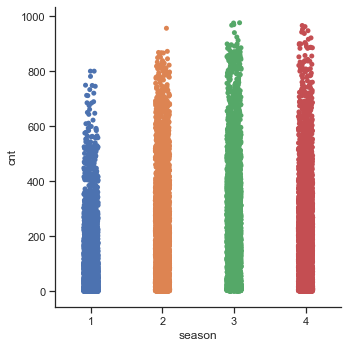

In [222]:
sns.catplot(x="season", y="cnt", data=data);
print('Season:\n1:spring\n2:summer\n3:fall\n4:winter \n\nThis attribute helped us to visualise the effect of seasonality on the bike rental usage.We observe that the highest rentals has been in the 3rd season(Fall) followed by summer and then winter, which gives us the inutuive belief that riders prefer to ride in warm to pleasant climates in comparison to colder climates.')


Looking at the Year Variable , it is observed that the total count of rental bike usage has gone up form Year 1 to Year 2 which could suggest that the system grew in popularity and information about the system was distributed and communicated well.It is important to note that this is only useful when we are making predictions for the year in the range (2011-12), because for fututre dates the algorithm has to be extrapolated significantly and will make this variable a less reliable predictor for a different time period


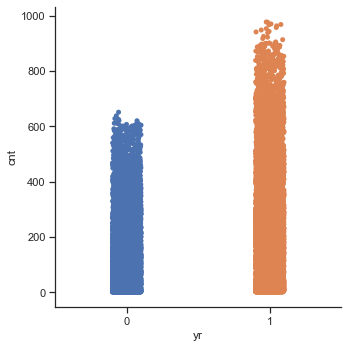

In [225]:
sns.catplot(x="yr", y="cnt", data=data);
print("Looking at the Year Variable , it is observed that the total count of rental bike usage has gone up form Year 1 to Year 2 which could suggest that the system grew in popularity and information about the system was distributed and communicated well.It is important to note that this is only useful when we are making predictions for the year in the range (2011-12), because for fututre dates the algorithm has to be extrapolated significantly and will make this variable a less reliable predictor for a different time period")

Now Lets look at the Effects of time on the count of total rental bikes usage.It shows that the lowest usage  is in the late night periods between midnight and 4am with lowest bieng in the interval 4-5am.The peaks are 7-8am and evening 16:00-18:00, which tends to match the office rush hours of typical city life.The fit is far from a linear and some data manipulation is required to so that we change to this to represent the usage rate and find a somewhat linear fit.Having features linearly predict the outcome reduces the need for complex non-linear models.


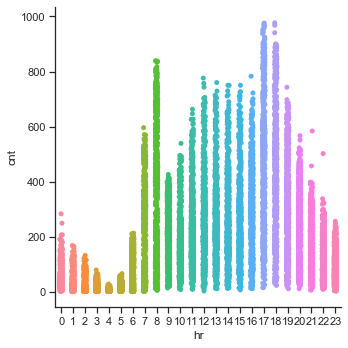

In [227]:
sns.catplot(x="hr", y="cnt", data=data);
print('Now Lets look at the Effects of time on the count of total rental bikes usage.It shows that the lowest usage  is in the late night periods between midnight and 4am with lowest bieng in the interval 4-5am.The peaks are 7-8am and evening 16:00-18:00, which tends to match the office rush hours of typical city life.The fit is far from a linear and some data manipulation is required to so that we change to this to represent the usage rate and find a somewhat linear fit.Having features linearly predict the outcome reduces the need for complex non-linear models.')

This plot is somewhat similar to the hour-count usage plot with again higher usage in the warmer months of fall and summer and lowest use in the month of January.Some datamanipulation technique could be again used to represent the data usage but however, the correlation is not as strong as the Hour versus count time graph.


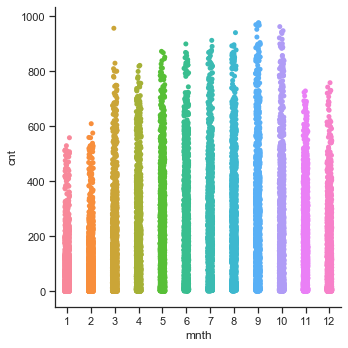

In [229]:
sns.catplot(x="mnth", y="cnt", data=data);
print("This plot is somewhat similar to the hour-count usage plot with again higher usage in the warmer months of fall and summer and lowest use in the month of January.Some datamanipulation technique could be again used to represent the data usage but however, the correlation is not as strong as the Hour versus count time graph.")

This factor is useful in determining the usage type as it helps the model to capture the variation of rental bikes during the weekdays.The main purpose of this attribute here is to identify any class schedules had effect on the demand.


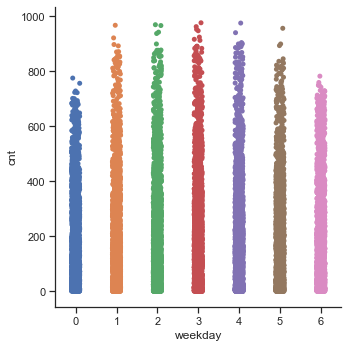

In [250]:
sns.catplot(x="weekday", y="cnt", data=data);
print("This factor is useful in determining the usage type as it helps the model to capture the variation of rental bikes during the weekdays.The main purpose of this attribute here is to identify any class schedules had effect on the demand.")

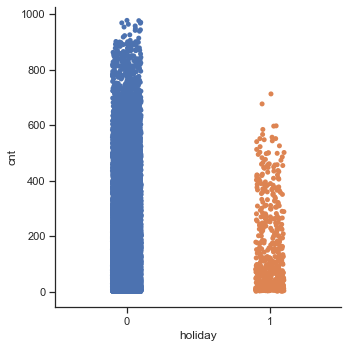

In [230]:
sns.catplot(x="holiday", y="cnt", data=data);
print("Holiday : whether that day is holiday or not")

Working-day : if day is neither weekend nor holiday , value is 1. Otherwise 0


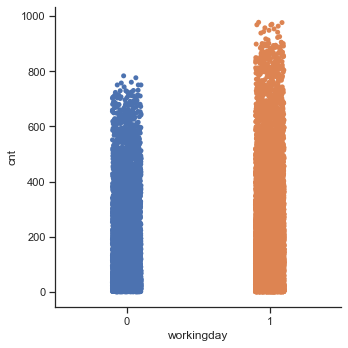

In [257]:
sns.catplot(x="workingday", y="cnt", data=data);
print("Working-day : if day is neither weekend nor holiday , value is 1. Otherwise 0")

The date itself provided in the format isnt something that can be used to process anykind of algorithms.From this date we can 
extract week number for that particular year and use that variable as predictor for the usage count.


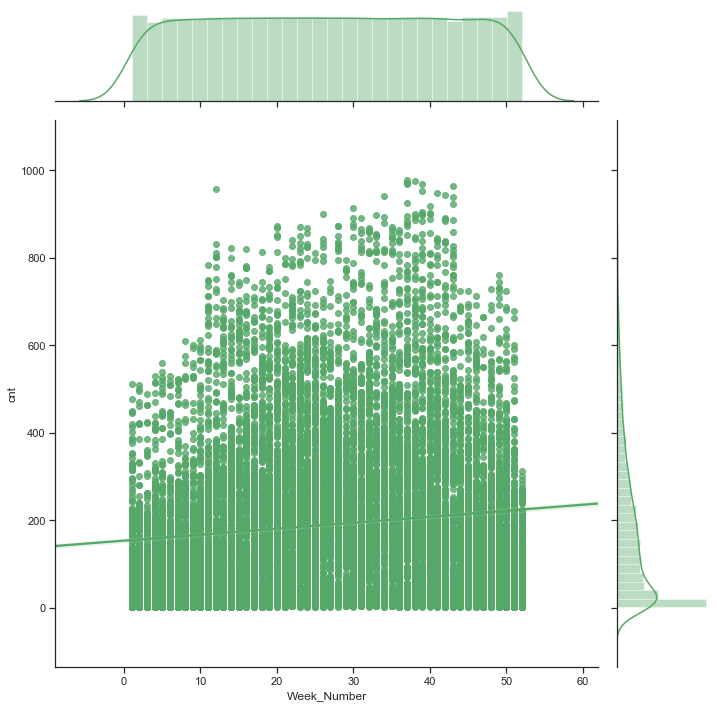

In [249]:
g = sns.jointplot("Week_Number", "cnt", data=data, kind="reg",color="g",height = 10)
print("The date itself provided in the format isnt something that can be used to process anykind of algorithms.From this date we can \nextract week number for that particular year and use that variable as predictor for the usage count.")

If we see the heatmap the casual usage count is more related with continous variables. It makes sense, if we actually gave a thought about it, then registered users who uses bike to commute to work are much less likely to deterred by uncomfortable weather excluding the extreme conditions. Therefore the model should predict the two categories i.e. casual and registered count seperately and add up the final number to find the total count. 


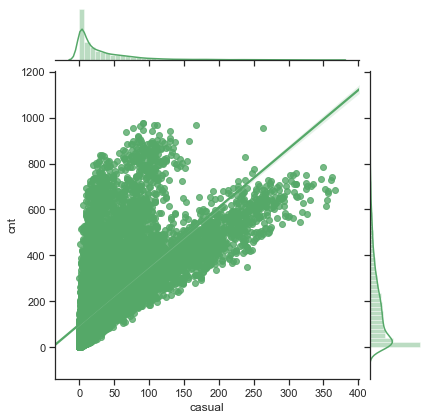

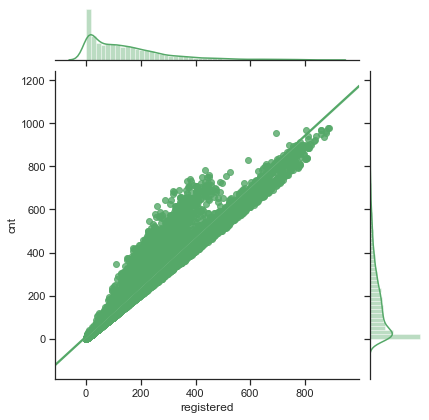

In [256]:
g = sns.jointplot("casual", "cnt", data=data, kind="reg",color='g')
g = sns.jointplot("registered", "cnt", data=data, kind="reg",color='g')
print("If we see the heatmap the casual usage count is more related with continous variables. It makes sense, if we actually gave a thought about it, then registered users who uses bike to commute to work are much less likely to deterred by uncomfortable weather excluding the extreme conditions. Therefore the model should predict the two categories i.e. casual and registered count seperately and add up the final number to find the total count. ")

# Pre - Processing using the Explorartory Analysis

# Model Representation and Prediction / Model Performance

In [261]:
F = data.drop(['dteday','instant','formatted_date',"casual","Week_Number","atemp"],1)
train = F.sample(frac=0.8)
test = F.drop(train.index)
train

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,registered,cnt
11485,2,1,4,18,0,6,0,3,0.40,0.47,0.0000,73,90
835,1,0,2,6,0,1,1,1,0.18,0.93,0.0000,29,30
12796,3,1,6,9,0,5,1,1,0.76,0.58,0.2239,278,333
8423,1,0,12,15,0,4,1,2,0.48,0.59,0.0000,186,214
545,1,0,1,21,0,1,1,1,0.14,0.63,0.1642,53,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12520,2,1,6,21,0,0,0,1,0.72,0.62,0.1642,170,253
11017,2,1,4,5,0,1,1,1,0.44,0.24,0.1940,30,32
14064,3,1,8,5,0,2,1,2,0.68,0.89,0.1940,35,36
14698,3,1,9,15,0,0,0,1,0.72,0.32,0.2537,412,696


In [262]:
# MLE estimation of the total count of rental bikes
x_train_array = np.array(train)
x_train = np.delete(x_train_array,[12],1)
x_t = x_train_array[:,12]
#Creating The training set into a Numpy array and extracting features and desired outputs

w_MLE = np.linalg.inv(x_train.T@x_train)@x_train.T@x_t 
print(w_MLE)
#calculating optimal set of parameters(MLE)

x_test_array = np.array(test)
x_test = np.delete(x_test_array,[12],1)
y_t = x_test_array[:,12]
#Using the optimal set of parameters to test our Model

y_MLE = x_test@w_MLE
error = y_MLE - y_t
#Calculationg the error

[ 5.01856693e-01  3.94870442e+00 -8.95854475e-02  6.67434377e-01
 -8.07688085e+00  1.37096840e+00 -3.81335539e+01  3.02409389e+00
  9.43573823e+01 -3.92421797e+01  1.25416638e+01  1.11700894e+00]


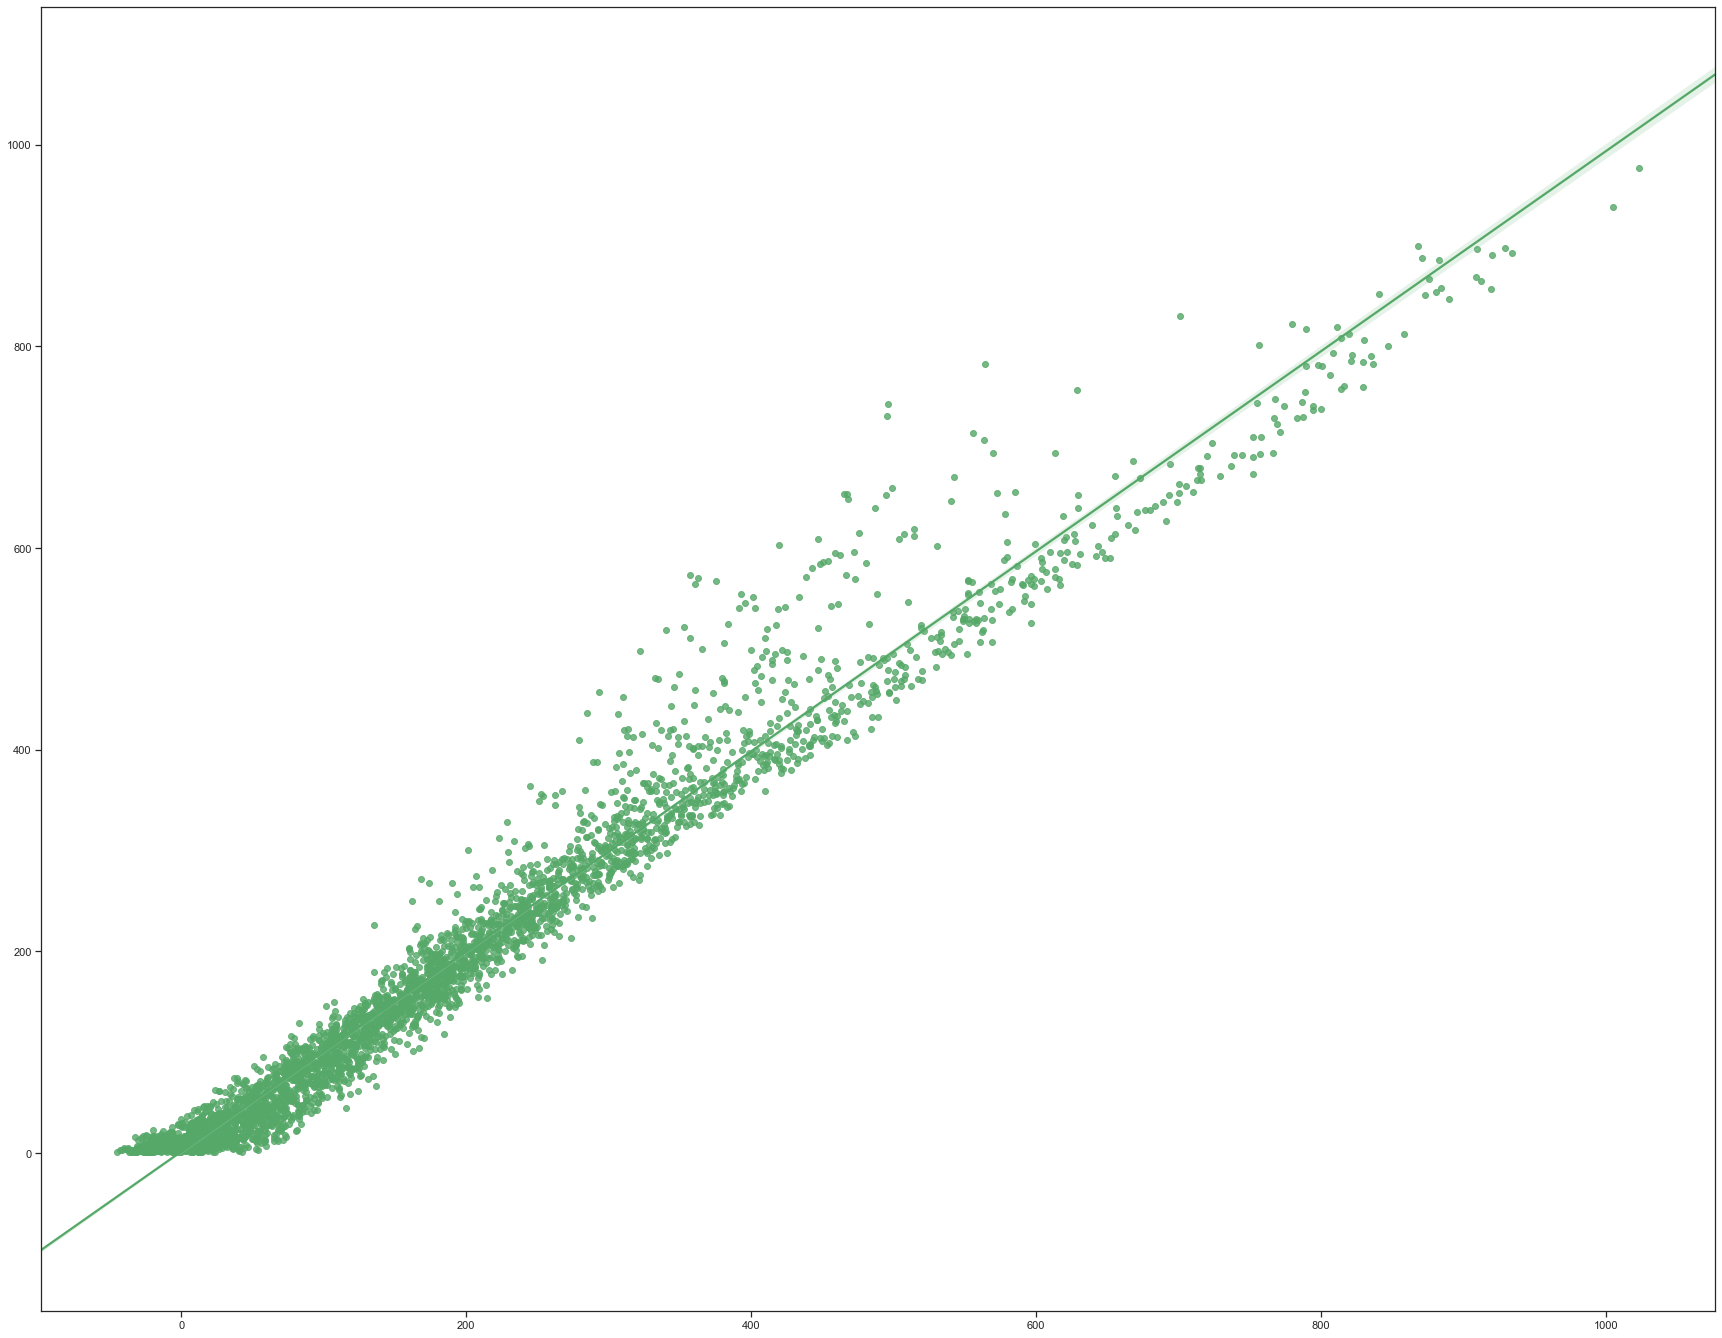

In [263]:
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.regplot(x = y_MLE, y = y_t, color="g",ax=ax)
# Plot of MLE estimation versus True count of total bike in the testing set.

In [271]:
#Calculating mean and median prediction error
#Calculating R squared value
aMLE = abs(error)
mean = sum(aMLE)/3476
print("Mean Prediction Error using MLE is:",mean)
median = np.median(aMLE)
print("Median Prediction Error using MLE is:",median)
SST = sum((y_t - np.mean(y_t))**2)
SSR = sum((y_MLE-np.mean(y_t))**2)
R_S = SSR/SST
print("R squared value is :",R_S)

Mean Prediction Error using MLE is: 0.19585006120711668
Median Prediction Error using MLE is: 16.530698867907276
R squared value is : 0.9820024687381165


In [265]:
la = 0.1

w_MAP = np.linalg.inv(x_train.T@x_train + la*np.identity(12))@x_train.T@x_t
print(w_MAP)
#calculating optimal set of parameters(MAP)

y_MAP = x_test@w_MAP
error2 = y_MAP - y_t

[ 5.03309719e-01  3.94862495e+00 -8.98650644e-02  6.67548322e-01
 -8.07341192e+00  1.37107042e+00 -3.81317809e+01  3.02233167e+00
  9.43351452e+01 -3.92300933e+01  1.25402295e+01  1.11701887e+00]


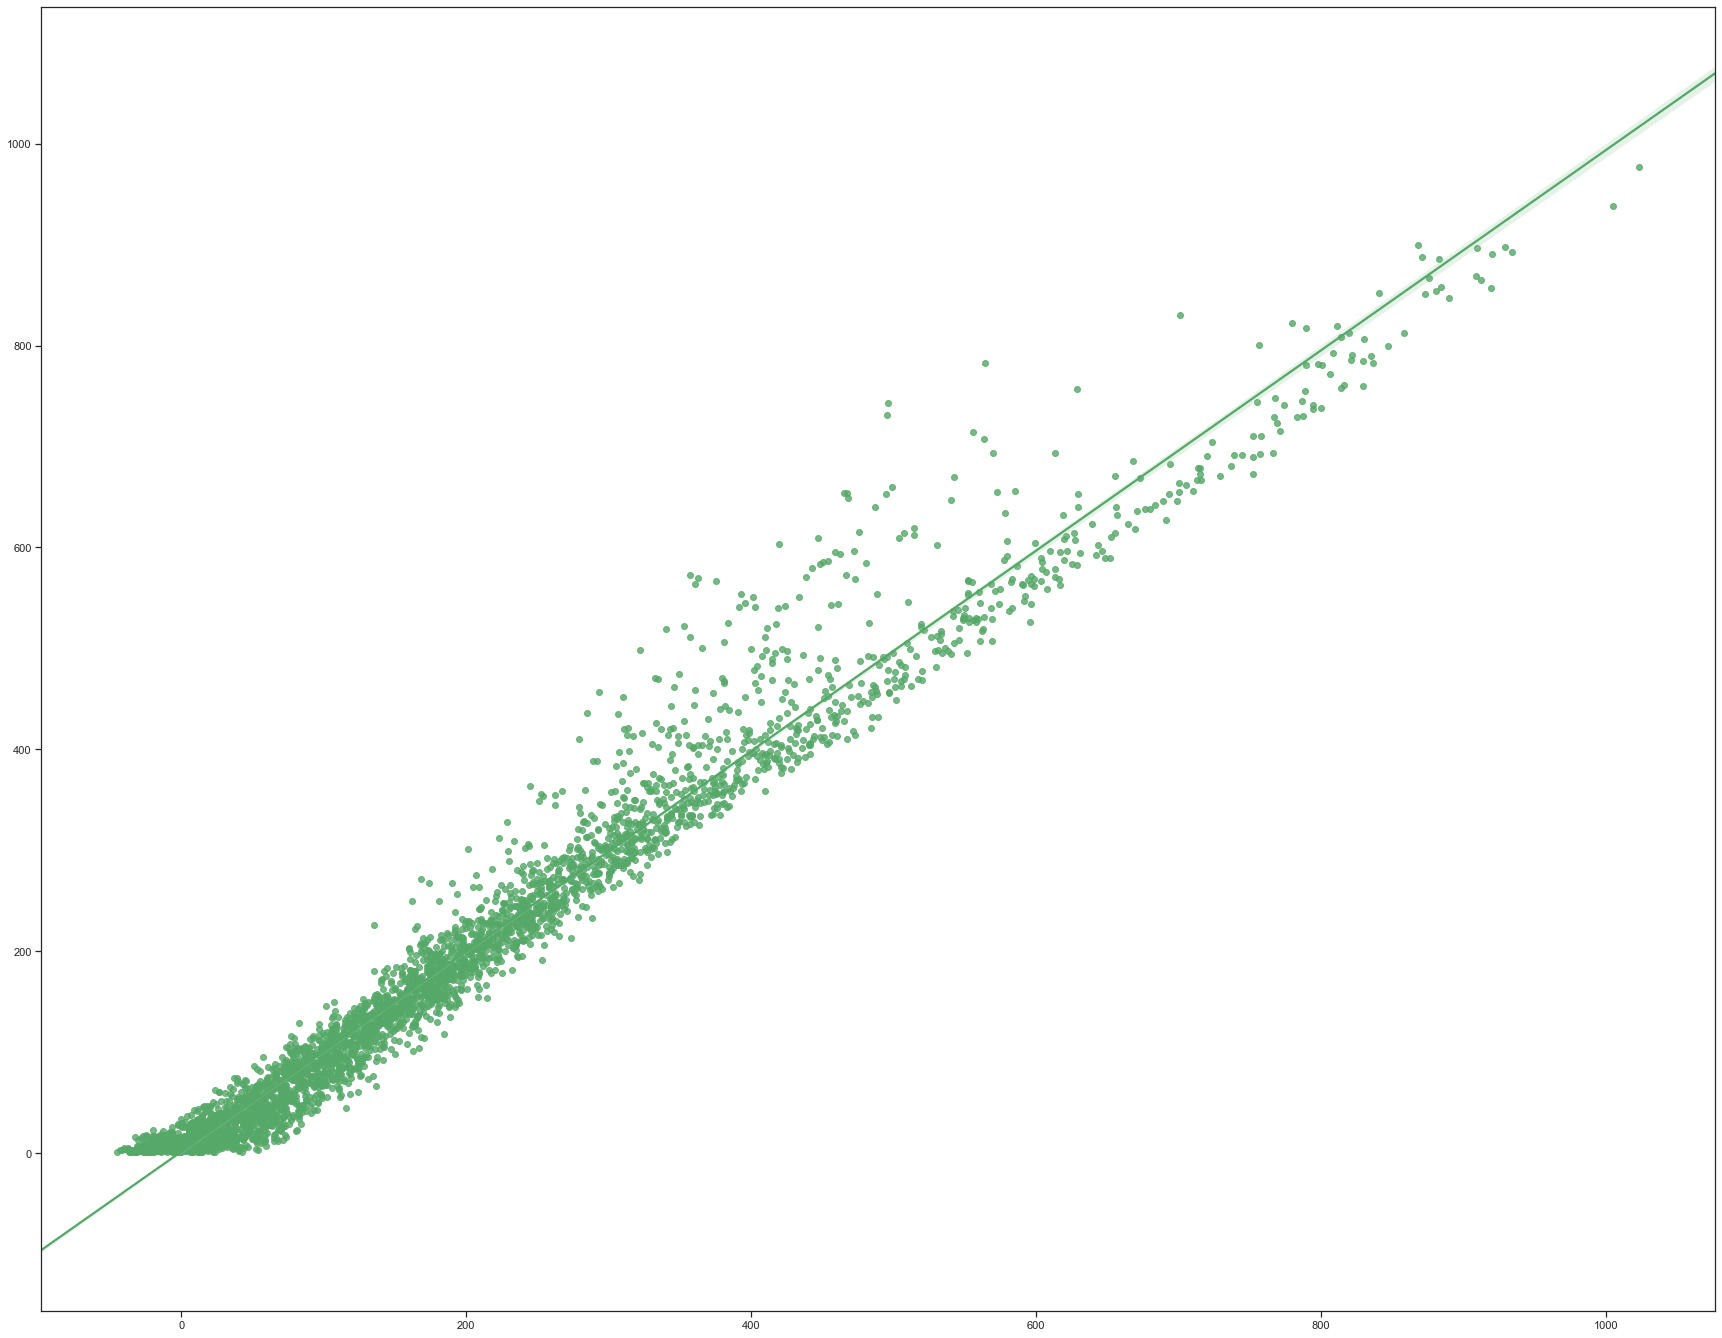

In [266]:
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.regplot(x = y_MAP, y = y_t, color="g",ax=ax)
# Plot of MAP estimation versus True count of total bike in the testing set.

In [267]:
#calculating optimal set of parameters(MAP)
aMAP = abs(error2)
mean = sum(aMAP)/3476
print("Mean Prediction Error using MAP is:",mean)
median = np.median(aMAP)
print("Median Prediction Error using MAP is:",median)
SSTM = sum((y_t - np.mean(y_t))**2)
SSRM = sum((y_MAP - np.mean(y_t))**2)
R_SM = SSRM/SSTM
print("R squared value is :",R_SM)

Mean Prediction Error using MAP is: 22.523237147621618
Median Prediction Error using MAP is: 16.528236526564754
R squared value is : 0.9819990209148247


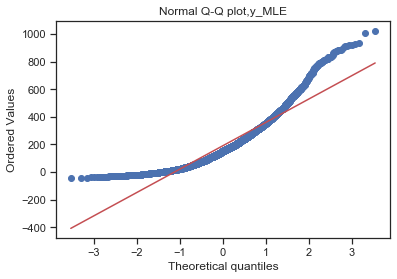

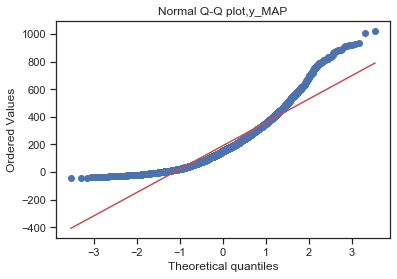

In [268]:
import scipy.stats as stats
stats.probplot(y_MLE, dist="norm", plot=plt)
plt.title("Normal Q-Q plot,y_MLE")
plt.show()
stats.probplot(y_MAP, dist="norm", plot=plt)
plt.title("Normal Q-Q plot,y_MAP")
plt.show()